In [10]:
import requests
import tellurium

from mira.sources.sbml import template_model_from_sbml_file
from mira.modeling import Model
from mira.modeling.ode import OdeModel
from mira.modeling.viz import GraphicalModel

In [2]:
model_url = ('https://raw.githubusercontent.com/pnnl-predictive-phenomics/concerto/'
             '7-consumer-resource-model-based-on-smetana-initial-outputs/'
             'concerto/notebooks/consumer_resource_modeling/'
             'microbial_induced_calcium_carbonate_precipitation_model.txt')

In [3]:
model_antimony = requests.get(model_url).text

In [4]:
tmodel = tellurium.loada(model_antimony)


In [5]:
tmodel.exportToSBML('model.xml')

In [6]:
tm = template_model_from_sbml_file('model.xml')

In [7]:
om = OdeModel(Model(tm), initialized=False)

In [8]:
om.get_interpretable_kinetics()

Matrix([
[                                                                                                                                                                                                                             -V_max_urease*urea/(K_m_urease + urea)],
[-CA_conc*K_cat_CA*carbon_dioxide/(K_m_CA + carbon_dioxide) - V_max_urease*urea/(K_m_urease + urea) - ammonia**2*k2f*water**2 + ammonium**2*hydroxide**2*k2r + bicarbonate*hydroxide*k5f - bicarbonate*k4r*water - carbonate*k5r*water + carbonic_acid*hydroxide*k4f],
[                                                                                                                                                                     V_max_urease*urea/(K_m_urease + urea) - ammonia**2*k2f*water**2 + ammonium**2*hydroxide**2*k2r],
[                                                                                                                                                                 -CA_conc*K_cat_CA*carbon_dioxide/(K_m_CA

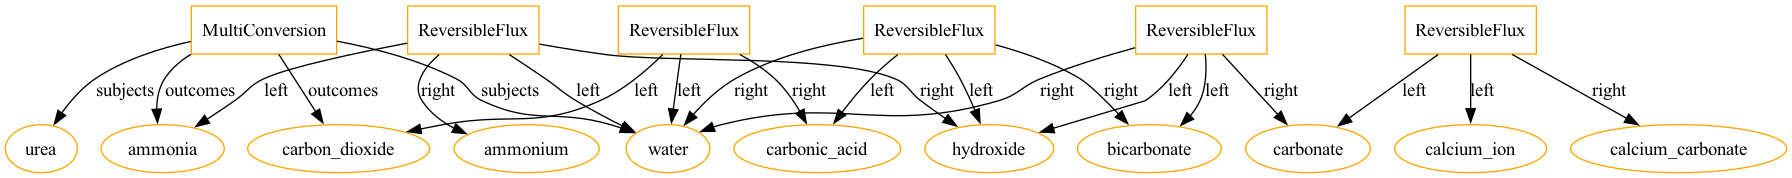

In [9]:
tm.draw_jupyter()

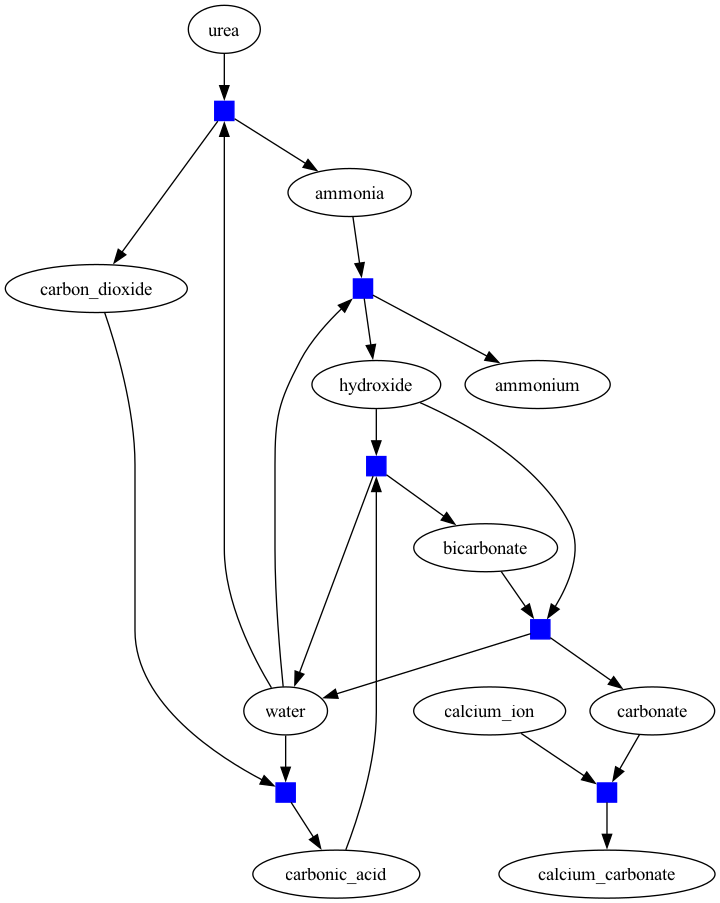

In [12]:
GraphicalModel.for_jupyter(tm)